In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline 

In [6]:
from collections import Counter

# 1. Loading the data 

In [7]:
df_train = pd.read_csv('titanic_dataset/train.csv')

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Finding Outlier  

In [9]:
def outlier(df,n,features):
    outlier_indices=[]
    
    for col in features:
        #1st quartile(25%)
        Q1 = np.percentile(df[col],25)
        #3rd quartile(75%)
        Q3 = np.percentile(df[col],75)
        #InterQuatile Range
        IQR=Q3-Q1
        
        outlier_border =IQR*1.5
        #determinining outlier columns
        outlier_column_list =df[(df[col]<Q1-outlier_border)|(df[col]>Q3+outlier_border)].index
        outlier_indices.extend(outlier_column_list)
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outlier

In [10]:
outlier_to_drop = outlier(df_train,2,["Age","SibSp","Parch","Fare"])

/home/anish/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [11]:
outlier_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [12]:
df_train.loc[outlier_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [13]:
df_train = df_train.drop(outlier_to_drop,axis=0).reset_index(drop=True)

# 4. Filling Null Value 

In [14]:
def null_count(df):
    missing_data = df.isnull().sum()
    missing_data =missing_data[missing_data>0].sort_values(ascending = False)
    percentage_of_null =missing_data*100/len(df)
    features_index = missing_data.index
    values =list(missing_data)
    percent_values = list(percentage_of_null)
    val_df =pd.DataFrame(data=values,index=features_index,columns=['null_count'])
    val_df['Null_percent'] = percent_values
    plt.figure(figsize=(10,10))
    sns.barplot(x=features_index,y=val_df['null_count'])
    plt.title("Total missing value by columns")
    return plt,val_df

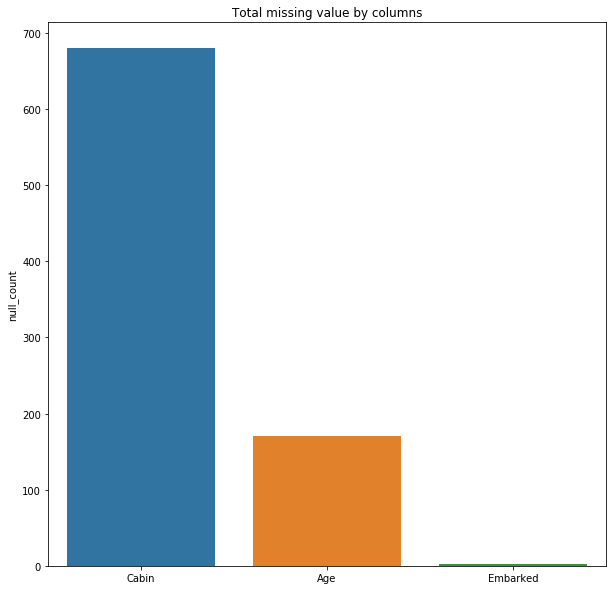

In [15]:
plt,val= null_count(df_train)

In [16]:
val

,null_count,Null_percent
Cabin,680,77.185017
Age,170,19.296254
Embarked,2,0.227015


In [17]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31',
       'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106',
       'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18',
       'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82',
       'B96 B98', 'E10', 'E44', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [18]:
df_train['Cabin']=[i[0] if not pd.isnull(i) else 'X' for i in df_train['Cabin'] ]

In [20]:
df_train['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [21]:
df_train['Total_fam'] = df_train['SibSp']+df_train['Parch']+1

In [22]:
title=[]
for i in df_train['Name']:
    title.append(i.split(",")[1].split(".")[0])
df_train['Title']=pd.Series(title)

In [23]:
df_train.drop('Name',axis=1,inplace=True)

In [24]:
df_train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [25]:
df_train['Title'].replace([' Mme',' Ms',' Mlle',' Mrs'],' Miss',inplace=True)

In [26]:
df_train['Title'].replace( [' Don', ' Rev', ' Dr', ' Major', ' Lady', ' Sir', ' Col', ' Capt',' the Countess', ' Jonkheer', ' Dona'],'Others',inplace=True)

In [27]:
df_train.drop('Ticket',axis=1,inplace=True)

In [28]:
df_train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()


Age
Pclass Sex              
1      female  34.879518
       male    41.504200
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

 Filling highest occuring frequency in Port of Emabrkment and mean value as per the dataframe of Pclass and sex

In [29]:
Counter(df_train['Embarked'])

Counter({'S': 634, 'C': 168, 'Q': 77, nan: 2})

In [30]:
df_train['Embarked'].fillna(value='S',inplace=True)

In [31]:
df_train['Age'].fillna(df_train.groupby(['Pclass','Sex'])['Age'].transform(np.mean),inplace=True)

# 4.Encoding the categorical dataset 

In [32]:
df_train['Sex_male']=pd.get_dummies(df_train['Sex'],drop_first=True,prefix='Sex')

In [33]:
df_train = pd.concat(objs=[df_train,pd.get_dummies(df_train['Embarked'],drop_first=True,prefix='Emabrked')],axis=1)

In [34]:
df_train = pd.concat(objs=[df_train,pd.get_dummies(df_train['Cabin'],drop_first=True,prefix='Cabin')],axis=1)

In [35]:
df_train = pd.concat(objs=[df_train,pd.get_dummies(df_train['Title'],drop_first=True,prefix='Title')],axis=1)

In [36]:
df_train = pd.concat(objs=[df_train,pd.get_dummies(df_train['Pclass'],drop_first=True,prefix='Pclass')],axis=1)

In [37]:
df_train.drop(labels=['PassengerId','Pclass','Sex','Embarked','Title','Cabin'],axis=1,inplace=True)

In [39]:
df_train.head(10)

,Survived,Age,SibSp,Parch,Fare,Total_fam,Sex_male,Emabrked_Q,Emabrked_S,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Title_ Miss,Title_ Mr,Title_Others,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,2,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,26.000000,0,0,7.9250,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,35.000000,0,0,8.0500,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
5,0,26.507589,0,0,8.4583,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
6,0,54.000000,0,0,51.8625,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
7,0,2.000000,3,1,21.0750,5,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8,1,27.000000,0,2,11.1333,3,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
9,1,14.000000,1,0,30.0708,2,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
df_y =df_train['Survived']

In [42]:
df_X = df_train.drop(labels='Survived',axis=1)

In [43]:
X_columns = df_X.columns

In [44]:
norm = StandardScaler()

In [45]:
scaled_df = norm.fit_transform(df_X)

In [46]:
df_X = pd.DataFrame(scaled_df,columns=X_columns)

#  5 .Train Test splitting 

In [47]:
from sklearn.model_selection  import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=23)

In [49]:
[X_train.shape,y_train.shape,X_test.shape,y_test.shape]

[(704, 21), (704,), (177, 21), (177,)]

# 6. Modelling and prediction using default Parameter 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [52]:
f1_score_default=[]
f1_score_tune =[]

In [53]:
default_train_accuracy=[]
default_test_accuracy=[]
default_model =['KNN','RFC','SVM','XGB','LOG_REG']

#  6.1 KNN with default parameter

In [54]:
knn_d = KNeighborsClassifier()

In [55]:
knn_d.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
default_train_accuracy.append(accuracy_score(y_train,knn_d.predict(X_train)))

In [57]:
default_test_accuracy.append(accuracy_score(y_test,knn_d.predict(X_test)))

In [58]:
f1_score_default.append(f1_score(y_test,knn_d.predict(X_test)))

In [59]:
confusion_matrix(y_test,knn_d.predict(X_test))

array([[97, 13],
       [20, 47]])

# 6.2  Random Forest Classifier with Default parameter

In [60]:
rfc_d =RandomForestClassifier()

In [61]:
rfc_d.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
default_train_accuracy.append(accuracy_score(y_train,rfc_d.predict(X_train)))

In [63]:
default_test_accuracy.append(accuracy_score(y_test,rfc_d.predict(X_test)))

In [64]:
f1_score_default.append(f1_score(y_test,rfc_d.predict(X_test)))

In [65]:
confusion_matrix(y_test,rfc_d.predict(X_test))

array([[98, 12],
       [20, 47]])

# 6.3  Support Vector Machine with Default parameter 

In [66]:
svc_d =SVC()

In [67]:
svc_d.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
default_train_accuracy.append(accuracy_score(y_train,svc_d.predict(X_train)))

In [69]:
default_test_accuracy.append(accuracy_score(y_test,svc_d.predict(X_test)))

In [70]:
f1_score_default.append(f1_score(y_test,svc_d.predict(X_test)))

In [71]:
confusion_matrix(y_test,svc_d.predict(X_test))

array([[100,  10],
       [ 23,  44]])

# 6.4 XGBoost with Default Parameter 

In [72]:
xgb_d =XGBClassifier()

In [73]:
xgb_d.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
default_train_accuracy.append(accuracy_score(y_train,xgb_d.predict(X_train)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
default_test_accuracy.append(accuracy_score(y_test,xgb_d.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
f1_score_default.append(f1_score(y_test,xgb_d.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
confusion_matrix(y_test,xgb_d.predict(X_test))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[102,   8],
       [ 19,  48]])

# 6.5 Logistic Regression with Default Paramter 

In [78]:
log_reg_d =LogisticRegression()

In [79]:
log_reg_d.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
default_train_accuracy.append(accuracy_score(y_train,log_reg_d.predict(X_train)))

In [81]:
default_test_accuracy.append(accuracy_score(y_test,log_reg_d.predict(X_test)))

In [82]:
f1_score_default.append(f1_score(y_test,log_reg_d.predict(X_test)))

In [83]:
confusion_matrix(y_test,log_reg_d.predict(X_test))

array([[96, 14],
       [19, 48]])

# 7.  Modeling  and predicting  the value with parameter  tuning

In [85]:
from sklearn.grid_search import GridSearchCV

In [86]:
tune_train_accuracy=[]
tune_test_accuracy=[]
tune_model =['KNN','RFC','SVM','XGB','LOG_REG']

# 7.1 KNN  Model Tuning and Predictions 

In [87]:
knn =KNeighborsClassifier()
k_range = list(range(1,40))
param_knn = dict(n_neighbors = k_range)
gsearch_knn = GridSearchCV(estimator=knn,param_grid=param_knn,scoring='accuracy',verbose=1)
gsearch_knn.fit(X_train,y_train)

Fitting 3 folds for each of 78 candidates, totalling 234 fits


[Parallel(n_jobs=1)]: Done 234 out of 234 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [88]:
 knn_best =gsearch_knn.best_estimator_

In [89]:
tune_train_accuracy.append(accuracy_score(y_train,knn_best.predict(X_train)))

In [90]:
tune_test_accuracy.append(accuracy_score(y_test,knn_best.predict(X_test)))

In [91]:
f1_score_tune.append(f1_score(y_test,knn_best.predict(X_test)))

In [92]:
confusion_matrix(y_test,knn_best.predict(X_test))

array([[101,   9],
       [ 26,  41]])

# 7.2 Random Forest Classifier Model Tuning and Prediction 

In [93]:
rfc= RandomForestClassifier()
rfc_param ={
    'max_depth':[3,5,7],
    'max_features':[5,7,9],
    'min_samples_split':[4,6,8],
    'min_samples_leaf':[1,3,5],
    'n_estimators':[300,500,700]}
gsearch_rfc=GridSearchCV(estimator=rfc,param_grid=rfc_param,scoring='accuracy',n_jobs=4,verbose=1)
gsearch_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 729 out of 729 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7], 'max_features': [5, 7, 9], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [1, 3, 5], 'n_estimators': [300, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [94]:
gsearch_rfc.best_params_

{'max_depth': 7,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [95]:
rfc_best=gsearch_rfc.best_estimator_

In [96]:
tune_train_accuracy.append(accuracy_score(y_train,rfc_best.predict(X_train)))

In [97]:
tune_test_accuracy.append(accuracy_score(y_test,rfc_best.predict(X_test)))

In [98]:
f1_score_tune.append(f1_score(y_test,rfc_best.predict(X_test)))

In [99]:
confusion_matrix(y_test,rfc_best.predict(X_test))

array([[100,  10],
       [ 19,  48]])

# 7.3 SVM Model Tuning and Predictions

In [100]:
svmc =SVC()

svm_param={
    'kernel':['rbf'],
    'gamma':[0.0005,0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000]}
gsearch_svm=GridSearchCV(estimator=svmc,param_grid=svm_param,scoring='accuracy',verbose=1)
gsearch_svm.fit(X_train,y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': [0.0005, 0.001, 0.01, 0.1, 1], 'C': [1, 10, 50, 100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [101]:
svm_best = gsearch_svm.best_estimator_

In [102]:
tune_train_accuracy.append(accuracy_score(y_train,svm_best.predict(X_train)))

In [103]:
tune_test_accuracy.append(accuracy_score(y_test,svm_best.predict(X_test)))

In [104]:
f1_score_tune.append(f1_score(y_test,svm_best.predict(X_test)))

In [105]:
confusion_matrix(y_test,svm_best.predict(X_test))

array([[102,   8],
       [ 22,  45]])

# 7.4 XGBoost Model Tuning and Predictions 

In [106]:
xgb = XGBClassifier()

xgb_param ={
    'max_depth':[8,9,10],
    'min_child_weight':[2,3,4],
    'gamma':[0.0],
    'subsample':[0.9],
    'colsample_bytree':[0.3,0.4,0.5],
    'reg_alpha':[0.1],
    'learning_rate':[0.01,0.05,0.1]
}

In [107]:
gsearch_xgb = GridSearchCV(estimator=xgb,param_grid=xgb_param,scoring='accuracy',n_jobs=4,verbose=1)
gsearch_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=4)]: Done 243 out of 243 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [8, 9, 10], 'min_child_weight': [2, 3, 4], 'gamma': [0.0], 'subsample': [0.9], 'colsample_bytree': [0.3, 0.4, 0.5], 'reg_alpha': [0.1], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [108]:
xgb_best = gsearch_xgb.best_estimator_

In [109]:
tune_train_accuracy.append(accuracy_score(y_train,xgb_best.predict(X_train)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [110]:
tune_test_accuracy.append(accuracy_score(y_test,xgb_best.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [111]:
f1_score_tune.append(f1_score(y_test,xgb_best.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [112]:
confusion_matrix(y_test,xgb_best.predict(X_test))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[103,   7],
       [ 18,  49]])

# 7.5 Logistics Regression Model Tuning and Predictions 

In [113]:
log_reg =LogisticRegression()

log_reg_param = {
    "C":np.logspace(-3,3,7),
    "penalty":["l1","l2"]}
gsearch_log_reg = GridSearchCV(log_reg,param_grid=log_reg_param,scoring='accuracy',verbose=1)
gsearch_log_reg.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [114]:
log_reg_best = gsearch_xgb.best_estimator_

In [116]:
tune_train_accuracy.append(accuracy_score(y_train,log_reg_best.predict(X_train)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [117]:
tune_test_accuracy.append(accuracy_score(y_test,log_reg_best.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [118]:
f1_score_tune.append(f1_score(y_test,log_reg_best.predict(X_test)))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [119]:
confusion_matrix(y_test,log_reg_best.predict(X_test))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[103,   7],
       [ 18,  49]])

# 8. EDA of Model Tuning 

In [120]:
df_default=pd.DataFrame(data=np.c_[default_train_accuracy,default_test_accuracy,tune_train_accuracy,
                                   tune_test_accuracy,f1_score_default,f1_score_tune],index=default_model,
                        columns=['default_train_accuracy','default_test_accuracy','tune_train_accuracy',
                                 'tune_test_accuracy','f1_score_default','f1_score_tune'])

In [121]:
df_default

,default_train_accuracy,default_test_accuracy,tune_train_accuracy,tune_test_accuracy,f1_score_default,f1_score_tune
KNN,0.865057,0.813559,0.822443,0.802260,0.740157,0.700855
RFC,0.973011,0.819209,0.904830,0.836158,0.746032,0.768000
SVM,0.862216,0.813559,0.876420,0.830508,0.727273,0.750000
XGB,0.887784,0.847458,0.900568,0.858757,0.780488,0.796748
LOG_REG,0.840909,0.813559,0.900568,0.858757,0.744186,0.796748


Text(0, 0.5, 'Accuracy')

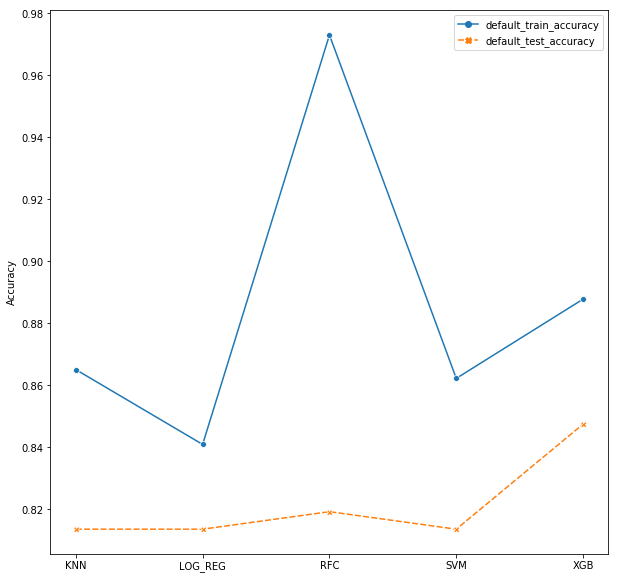

In [128]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.DataFrame(df_default[['default_train_accuracy','default_test_accuracy']]), markers=True)
plt.ylabel("Accuracy")

Text(0.5, 0, 'Difference between  train and test accuracy ')

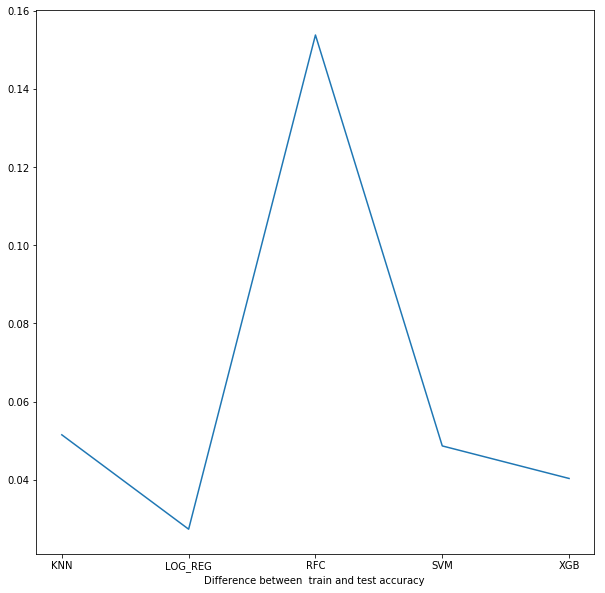

In [129]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df_default['default_train_accuracy']-df_default['default_test_accuracy'])
plt.xlabel("Difference between  train and test accuracy ")

From this model we can conclude that RFC has overfit the data ,wheres as logistic regression has minimum over fitting

Text(0, 0.5, 'Accuracy')

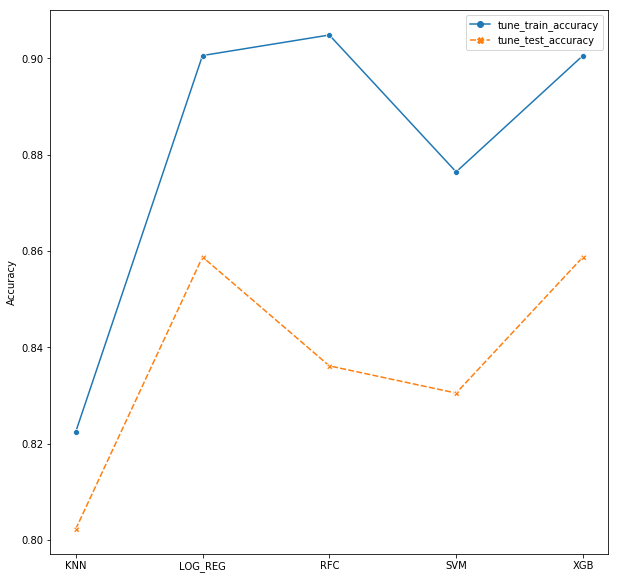

In [134]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.DataFrame(df_default[['tune_train_accuracy','tune_test_accuracy']]), markers=True)
plt.ylabel("Accuracy")

Text(0.5, 0, 'Difference between  train and test accuracy ')

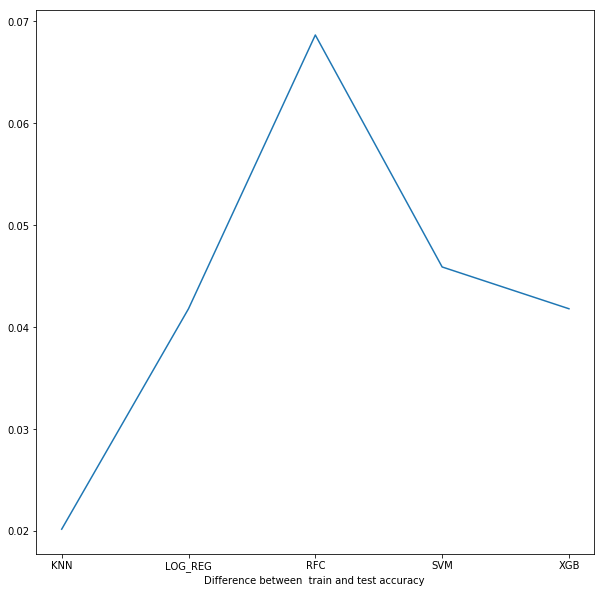

In [135]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df_default['tune_train_accuracy']-df_default['tune_test_accuracy'])
plt.xlabel("Difference between  train and test accuracy ")

RFC has overfit the data where KNN has least overfitting 

Text(0, 0.5, 'Accuracy')

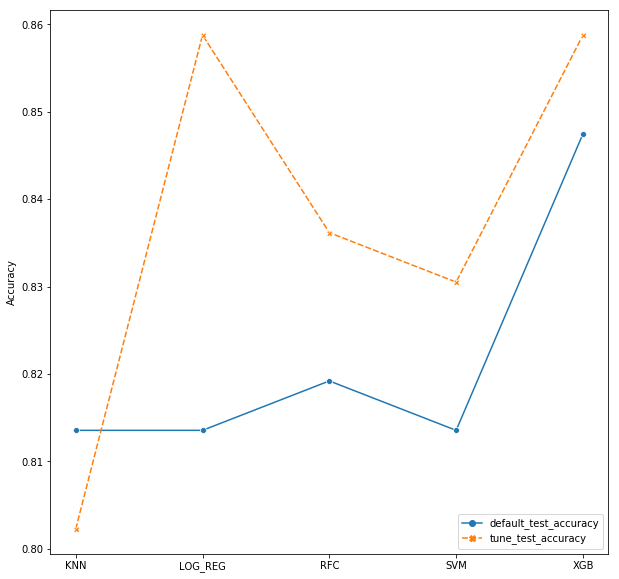

In [136]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.DataFrame(df_default[['default_test_accuracy','tune_test_accuracy']]), markers=True)
plt.ylabel("Accuracy")

 Tuned parameter has more accuracy  except KNN

Text(0, 0.5, 'F1_score')

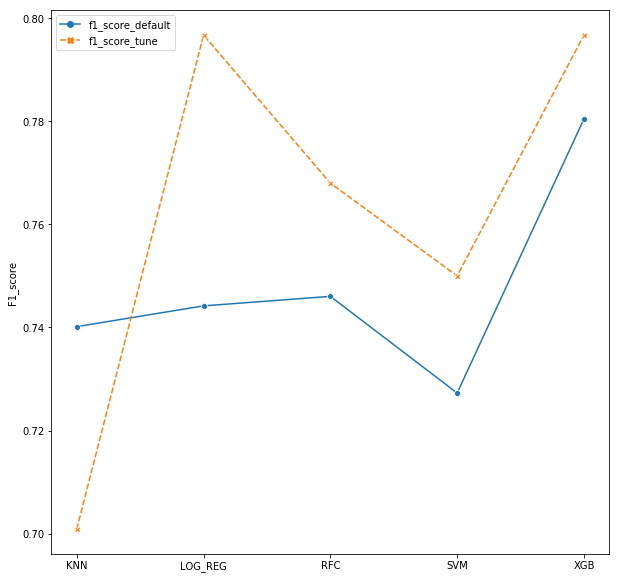

In [137]:
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.DataFrame(df_default[['f1_score_default','f1_score_tune']]), markers=True)
plt.ylabel("F1_score")

F1 Score increased  in tune parameter than default paramter except KNN 

# Using Voting Classifier 

In [141]:
from sklearn.ensemble import VotingClassifier

In [142]:
voting_default = VotingClassifier(estimators=[('knn_d',knn_d),('rfc_d',rfc_d),('svm_d',svc_d),
                                              ('xgb_d',xgb_d),('log_reg_d',log_reg_d)])

In [143]:
voting_default.fit(X_train,y_train)

VotingClassifier(estimators=[('knn_d', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('rfc_d', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [144]:
accuracy_score(y_test,voting_default.predict(X_test))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8361581920903954

In [146]:
voting_tune = VotingClassifier(estimators=[('knn_t',knn_best),('rfc_t',rfc_best),('svm_t',svm_best),
                                              ('xgb_t',xgb_best),('log_reg_t',log_reg_best)])

In [147]:
voting_tune.fit(X_train,y_train)

VotingClassifier(estimators=[('knn_t', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')), ('rfc_t', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, ..._alpha=0.1,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [148]:
accuracy_score(y_test,voting_tune.predict(X_test))

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8531073446327684

/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anish/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

Text(0, 0.5, 'Accuracy ')

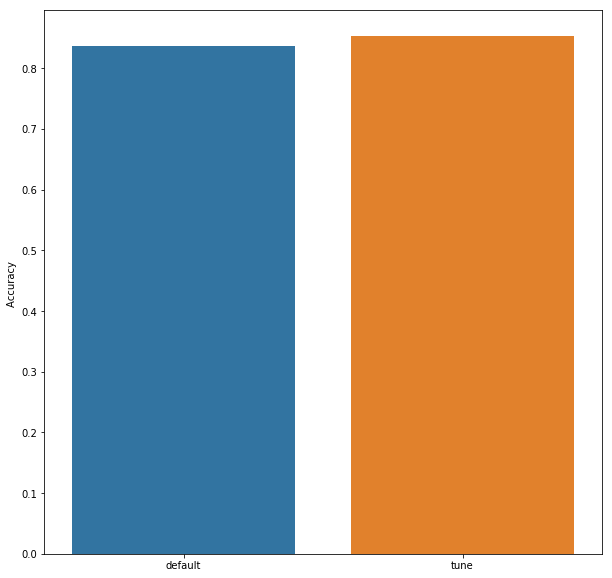

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(x=['default','tune'],y=[accuracy_score(y_test,voting_default.predict(X_test)),
                                    accuracy_score(y_test,voting_tune.predict(X_test))])
plt.ylabel("Accuracy ")

# Summary

1.From this model we can conclude that RFC has overfit the data ,wheres as logistic regression has minimum over fitting

2.RFC has overfit the data where KNN has least overfitting.

3.Tuned parameter has more accuracy  except KNN.

4.F1 Score increased  in tune parameter than default paramter except KNN 

5.There is a slightly  increase in accuracy while tuning

6.Model Used are K Nearest Neigbour,Random Forest Classifier(for Bagging),XGBoost(Boosting),Logistics Regression,Support Vector Machine and Voting Classifier for Stacking.

7.Summary result:
****************************************************************************************************************
Model ||default_train_acc||default_test_acc||tune_train_acc|| tune_test_accur ||f1_score_default ||f1_score_tune
*****************************************************************************************************************

KNN	     0.865057	        0.813559	       0.822443	        0.802260	       0.740157	        0.700855

RFC	     0.973011	        0.819209	       0.904830	        0.836158	       0.746032	        0.768000

SVM	     0.862216	        0.813559	       0.876420	        0.830508	       0.727273	        0.750000

XGB	     0.887784	        0.847458	       0.900568	        0.858757	       0.780488	        0.796748

LOG_REG	 0.840909	        0.813559	       0.900568	        0.858757	       0.744186	        0.796748
*****************************************************************************************************************
voting calssifier (Default) : 0.8361581920903954
voting classifer (tune)     : 0.8531073446327684